# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring and Cleaning Data

In [2]:
train = pd.read_csv("../input/credit-score-classification/train.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
train.shape #check dimensions

(100000, 28)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
train.head(5) # check the first 5 rows

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [7]:
categorical = train.dtypes[train.dtypes == "object"].index
print(categorical)
train[categorical].describe()

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


# drop unimportant columns









In [8]:
del train["ID"]     # Remove ID

#  MISSING VALUES

In [9]:
train.isnull().sum()

Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

<AxesSubplot:>

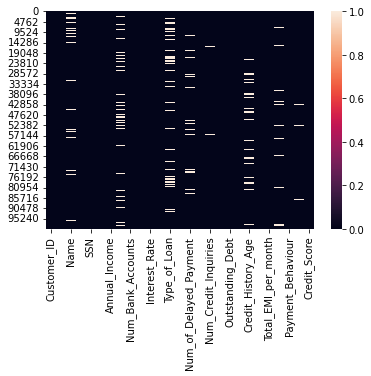

In [10]:
sns.heatmap(train.isnull())

In [11]:
train = train.dropna(thresh=23)

In [12]:
train.isnull().sum()

Customer_ID                     0
Month                           0
Name                         9978
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       14996
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11401
Delay_from_due_date             0
Num_of_Delayed_Payment       6998
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9023
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4475
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

<AxesSubplot:>

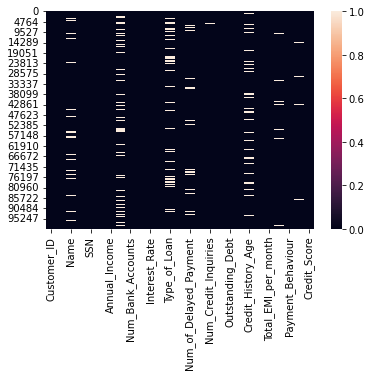

In [13]:
sns.heatmap(train.isnull())

In [14]:
train.loc[train.Monthly_Balance=='__-333333333333333333333333333__','Monthly_Balance'] = 0

 # Fill Missing data

In [15]:
train["Name"] = train["Name"].fillna(train["Name"].ffill())

In [16]:
train['Name'].isnull().sum()

0

In [17]:
train["Monthly_Inhand_Salary"].describe()

count    84997.000000
mean      4194.123442
std       3183.674894
min        303.645417
25%       1625.558333
50%       3093.745000
75%       5957.448333
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

In [18]:
train["Monthly_Inhand_Salary"] = train["Monthly_Inhand_Salary"].fillna(train["Monthly_Inhand_Salary"].mean())

In [19]:
train['Monthly_Inhand_Salary'].isnull().sum()

0

In [20]:
train["Type_of_Loan"].describe()

count             88592
unique             6260
top       Not Specified
freq               1408
Name: Type_of_Loan, dtype: object

In [21]:
train["Type_of_Loan"] = train["Type_of_Loan"].fillna(train["Type_of_Loan"].ffill())

In [22]:
train['Type_of_Loan'].isnull().sum()

0

In [23]:
train["Num_of_Delayed_Payment"].describe()

count     92995
unique      749
top          19
freq       5327
Name: Num_of_Delayed_Payment, dtype: object

In [24]:
train["Num_of_Delayed_Payment"] = train["Num_of_Delayed_Payment"].fillna(train["Num_of_Delayed_Payment"].ffill())

In [25]:
train['Num_of_Delayed_Payment'].isnull().sum()

0

In [26]:
train["Num_Credit_Inquiries"].describe()

count    98028.000000
mean        27.755927
std        193.184133
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

In [27]:
train["Num_Credit_Inquiries"] = train["Num_Credit_Inquiries"].fillna(train["Num_Credit_Inquiries"].mean())

In [28]:
train["Credit_History_Age"].describe()

count                      90970
unique                       404
top       15 Years and 11 Months
freq                         446
Name: Credit_History_Age, dtype: object

In [29]:
train["Credit_History_Age"] = train["Credit_History_Age"].fillna(train["Credit_History_Age"].ffill())

In [30]:
train["Amount_invested_monthly"].describe()

count         95518
unique        91046
top       __10000__
freq           4305
Name: Amount_invested_monthly, dtype: object

In [31]:
train["Amount_invested_monthly"] = train["Amount_invested_monthly"].fillna(train["Amount_invested_monthly"].ffill())

In [32]:
train["Monthly_Balance"].describe()

count     98793
unique    98785
top           0
freq          9
Name: Monthly_Balance, dtype: int64

In [33]:
train["Monthly_Balance"] = train["Monthly_Balance"].fillna(train["Monthly_Balance"].ffill())

# EDA

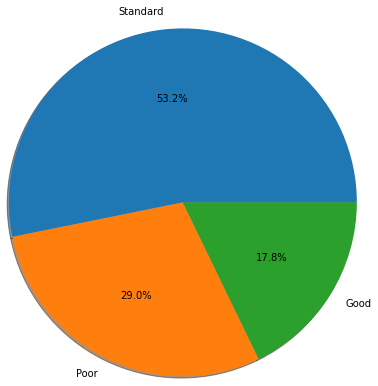

In [34]:
label = train.Credit_Score.value_counts().index
label_count = train.Credit_Score.value_counts().values
plt.pie(data=train, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=2)
plt.show()

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

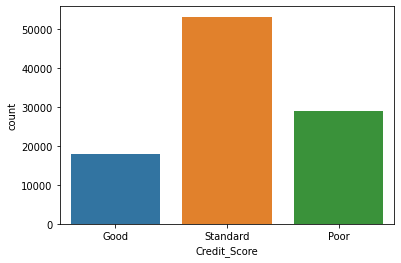

In [35]:
sns.countplot(x=train['Credit_Score'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

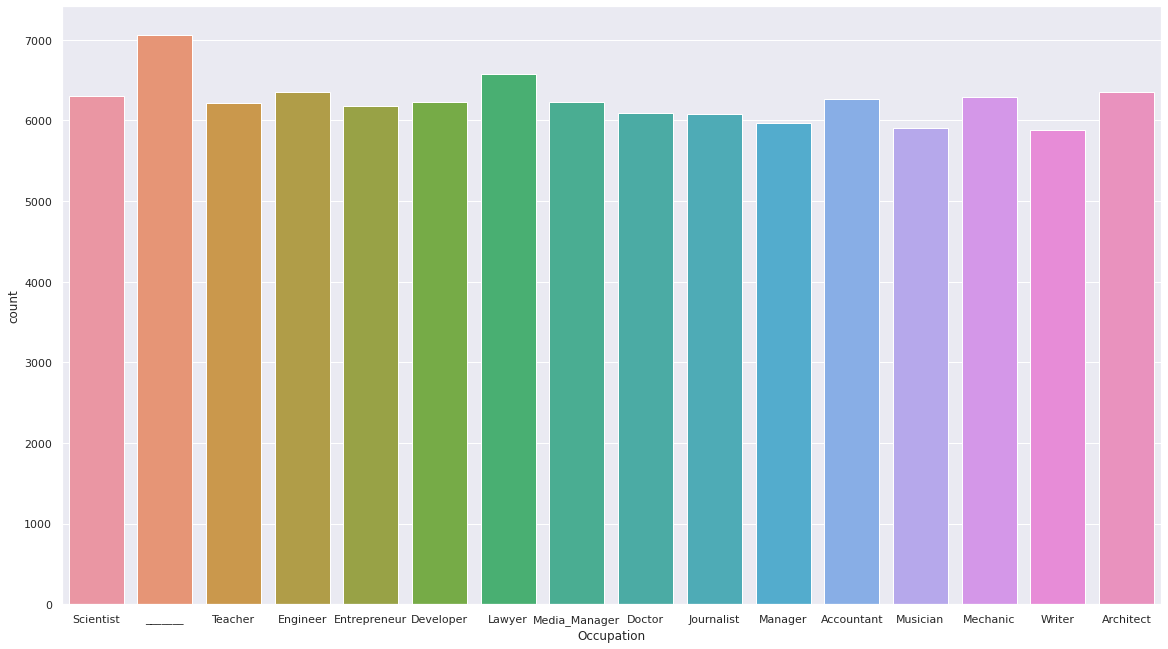

In [36]:
sns.set(rc={'figure.figsize':(19.7,11)})
sns.countplot(x=train["Occupation"])

<AxesSubplot:xlabel='Payment_of_Min_Amount', ylabel='count'>

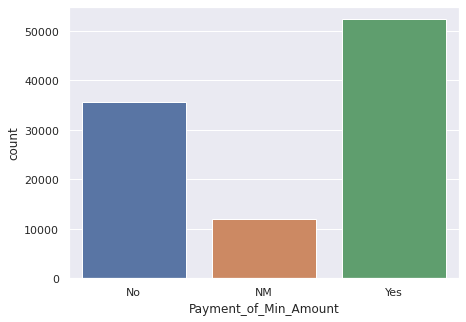

In [37]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(data=train,x="Payment_of_Min_Amount")

<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

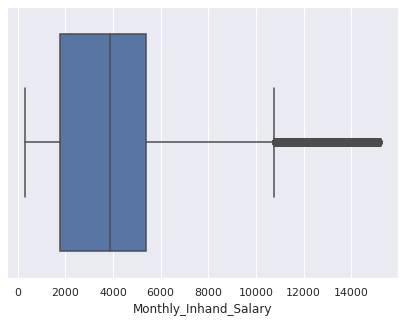

In [38]:
sns.boxplot(x=train["Monthly_Inhand_Salary"])

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Credit_Score'>

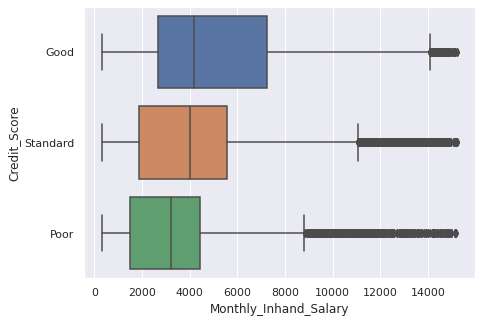

In [39]:
sns.boxplot(data=train, x="Monthly_Inhand_Salary", y="Credit_Score")

<AxesSubplot:xlabel='Month', ylabel='Interest_Rate'>

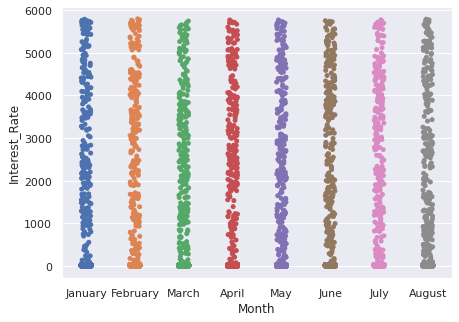

In [40]:
sns.stripplot(data=train, x="Month", y="Interest_Rate")

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99993 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               99993 non-null  object 
 1   Month                     99993 non-null  object 
 2   Name                      99993 non-null  object 
 3   Age                       99993 non-null  object 
 4   SSN                       99993 non-null  object 
 5   Occupation                99993 non-null  object 
 6   Annual_Income             99993 non-null  object 
 7   Monthly_Inhand_Salary     99993 non-null  float64
 8   Num_Bank_Accounts         99993 non-null  int64  
 9   Num_Credit_Card           99993 non-null  int64  
 10  Interest_Rate             99993 non-null  int64  
 11  Num_of_Loan               99993 non-null  object 
 12  Type_of_Loan              99993 non-null  object 
 13  Delay_from_due_date       99993 non-null  int64  
 14  Num_of

# encoder

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99993 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               99993 non-null  object 
 1   Month                     99993 non-null  object 
 2   Name                      99993 non-null  object 
 3   Age                       99993 non-null  object 
 4   SSN                       99993 non-null  object 
 5   Occupation                99993 non-null  object 
 6   Annual_Income             99993 non-null  object 
 7   Monthly_Inhand_Salary     99993 non-null  float64
 8   Num_Bank_Accounts         99993 non-null  int64  
 9   Num_Credit_Card           99993 non-null  int64  
 10  Interest_Rate             99993 non-null  int64  
 11  Num_of_Loan               99993 non-null  object 
 12  Type_of_Loan              99993 non-null  object 
 13  Delay_from_due_date       99993 non-null  int64  
 14  Num_of

In [45]:
train.Monthly_Balance = train.Monthly_Balance.astype(float)

In [46]:
for i in train.columns:
    if (train[i].dtypes== 'object') :
        train[i] = le.fit_transform(train[i])

# split data

In [47]:
from sklearn.model_selection import train_test_split 
trainM, testM = train_test_split(train, test_size=0.3)

In [48]:
train_y = trainM[["Credit_Score"]]
train_x = trainM.drop(["Credit_Score"], axis=1) 
test_y = testM[["Credit_Score"]]
test_x = testM.drop(["Credit_Score"], axis=1)

## Data Scaling using Robust Scaler 

In [49]:
from sklearn.preprocessing import RobustScaler

In [50]:
ro_scaler = RobustScaler()
train_x = ro_scaler.fit_transform(train_x)
test_x = ro_scaler.fit_transform(test_x)

# logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr = LogisticRegression(C = 100)

In [53]:
lr.fit(train_x , train_y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=100)

In [54]:
lr.score(train_x , train_y)

0.596599757125509

In [55]:
lr.score(test_x, test_y)

0.5881725448363224

In [56]:
lr.predict(test_x)

array([2, 0, 2, ..., 2, 1, 2])

In [57]:
lr.coef_

array([[ 3.02414054e-02,  9.96364071e-03,  8.35100481e-03,
         1.93709640e-01,  1.30249778e-05, -4.94888767e-02,
        -6.64664416e-02,  1.80225206e-01, -3.00903271e-04,
        -3.47613179e-04, -1.97250075e-05, -1.95150279e-01,
         2.42305077e-02, -9.47134268e-01,  5.21547442e-02,
         4.66810136e-02, -3.24572618e-04, -1.86418653e-01,
         1.32544339e-01, -1.02416540e-02,  7.62870041e-02,
        -3.68529564e-01,  8.95433438e-06,  2.01777161e-02,
        -1.96179043e-01, -9.48615637e-02],
       [-2.40008366e-02, -2.02132358e-02, -8.72793383e-03,
        -1.48394791e-01, -2.60593990e-02,  3.07797723e-02,
         8.00667201e-02, -1.43476292e-01,  2.33645396e-04,
         2.97445784e-04,  3.56371661e-05,  2.12314505e-01,
        -4.16871145e-03,  7.58978903e-01,  4.25191330e-03,
         3.53639500e-02,  3.45688905e-04, -4.71038588e-02,
        -2.90284273e-01,  2.46598213e-02, -7.49700407e-02,
         1.47631632e-01, -6.81616277e-05, -3.65120317e-02,
         1.57

In [58]:
Y_pred = lr.predict(test_x)
data = pd.DataFrame(Y_pred)

In [59]:
data

,0
0,2
1,0
2,2
3,2
4,2
...,...
29993,2
29994,2
29995,2
29996,1


In [60]:
train_y

,Credit_Score
48274,2
68136,2
32793,2
63251,0
90517,1
...,...
5336,2
97432,1
32746,1
30718,0


# KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn = KNeighborsClassifier(n_neighbors=13)

In [63]:
knn.fit(train_x , train_y)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=13)

In [64]:
knn.score(train_x , train_y)

0.7155082505893278

In [65]:
knn.score(test_x , test_y)

0.6539435962397493

In [66]:
Y_pred = lr.predict(test_x)
data = pd.DataFrame(Y_pred)

In [67]:
data

,0
0,2
1,0
2,2
3,2
4,2
...,...
29993,2
29994,2
29995,2
29996,1


In [68]:
train_y

,Credit_Score
48274,2
68136,2
32793,2
63251,0
90517,1
...,...
5336,2
97432,1
32746,1
30718,0


# Decision Tree

In [69]:
from sklearn.tree  import DecisionTreeClassifier

In [70]:
dt =DecisionTreeClassifier(max_features=6 ,    max_depth=4)

In [71]:
dt.fit(train_x ,train_y)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [72]:
dt.score(train_x , train_y)

0.6316308307736267

In [73]:
dt.score(test_x , test_y)

0.6223748249883325

[Text(0.5, 0.9, 'X[17] <= -1.5\ngini = 0.602\nsamples = 69995\nvalue = [12483, 20356, 37156]'),
 Text(0.25, 0.7, 'X[18] <= 0.024\ngini = 0.49\nsamples = 13410\nvalue = [198, 8095, 5117]'),
 Text(0.125, 0.5, 'X[23] <= -0.995\ngini = 0.362\nsamples = 5784\nvalue = [13, 4419, 1352]'),
 Text(0.0625, 0.3, 'X[18] <= -0.18\ngini = 0.498\nsamples = 34\nvalue = [0, 18, 16]'),
 Text(0.03125, 0.1, 'gini = 0.461\nsamples = 25\nvalue = [0, 16, 9]'),
 Text(0.09375, 0.1, 'gini = 0.346\nsamples = 9\nvalue = [0, 2, 7]'),
 Text(0.1875, 0.3, 'X[7] <= 0.351\ngini = 0.36\nsamples = 5750\nvalue = [13, 4401, 1336]'),
 Text(0.15625, 0.1, 'gini = 0.37\nsamples = 5001\nvalue = [13, 3784, 1204]'),
 Text(0.21875, 0.1, 'gini = 0.29\nsamples = 749\nvalue = [0, 617, 132]'),
 Text(0.375, 0.5, 'X[7] <= -0.964\ngini = 0.523\nsamples = 7626\nvalue = [185, 3676, 3765]'),
 Text(0.3125, 0.3, 'X[0] <= -0.325\ngini = 0.325\nsamples = 44\nvalue = [0, 9, 35]'),
 Text(0.28125, 0.1, 'gini = 0.497\nsamples = 13\nvalue = [0, 7, 6]

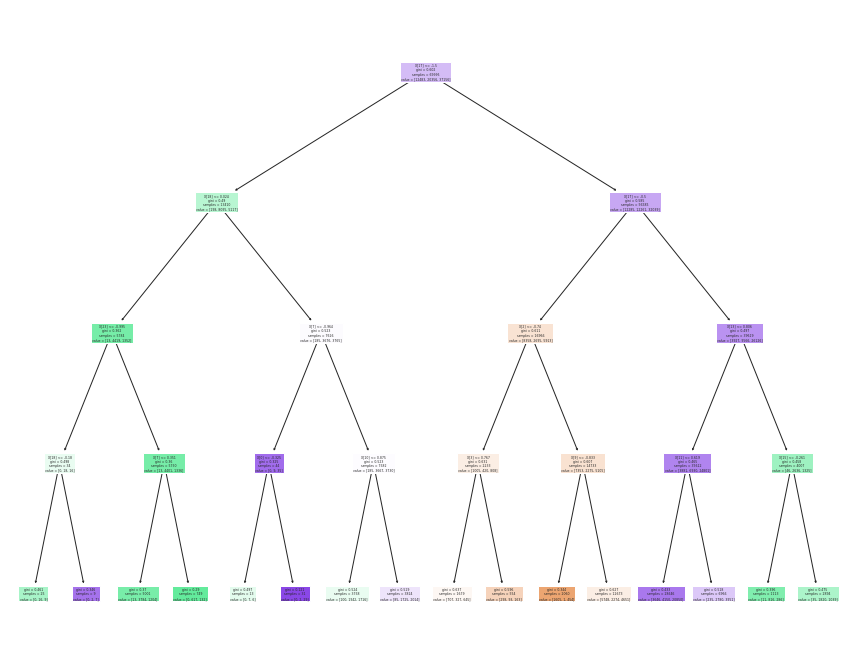

In [74]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

# RandomForest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf = RandomForestClassifier(max_features=5 ,    max_depth=4)

In [77]:
rf.fit(train_x , train_y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=4, max_features=5)

In [78]:
rf.score(train_x ,train_y)

0.6455603971712265

In [79]:
rf.score(test_x , test_y)

0.6363090872724848